In [9]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os as os
import numpy as np
import math
from scipy import stats


Socioeconomic Data:
Population:API_SP.POP.TOTL_DS2_en_csv_v2_6011311.csv
https://data.worldbank.org/indicator/SP.POP.TOTL?view=chart

Urban Population    
https://data.worldbank.org/indicator/SP.URB.TOTL.IN.ZS?view=chart

Dengue Incidence Data:dengue-incidence.csv
https://ourworldindata.org/grapher/dengue-incidence?tab=table

healthcare-access-and-quality-index file: healthcare-access-and-quality-index.csv    
https://ourworldindata.org/grapher/healthcare-access-and-quality-index?tab=table&time=1990..latest&country=
    
surface temperature:Annual_Surface_Temperature_Change.csv
https://climatedata.imf.org/pages/climatechange-data
    
Forst Area :API_AG.LND.FRST.ZS_DS2_en_csv_v2_5994693.csv
https://data.worldbank.org/indicator/AG.LND.FRST.ZS?end=2017&start=1990&view=chart

In [10]:
worldbank_POP_TOTL_file = "API_SP.POP.TOTL_DS2_en_csv_v2_6011311.csv"
dengueIncidence_file = "/Users/jahbar/Documents/GitHub/UN_ADS1_Assignment2/dengue_incidence_processed.csv"
surface_temperature_file_PH ="/Users/jahbar/Documents/GitHub/UN_ADS1_Assignment2/Annual_Surface_Temperature_Change_PH.csv"
forst_area_file ="/Users/jahbar/Documents/GitHub/UN_ADS1_Assignment2/API_AG.LND.FRST.ZS_DS2_en_csv_v2_5994693.csv"
healthcareAccessAndQualityIndex_file = "/Users/jahbar/Documents/GitHub/UN_ADS1_Assignment2/healthcare-access-and-quality-index.csv"

In [11]:
def processWorldbank_POP_TOT(filename):
    df_worldbank = pd.read_csv(filename,skiprows=3)
    #data cleanning
    #Country Code is needed for future processing
    df_Bycountry_pop = df_worldbank.loc[:, ~df_worldbank.columns.isin(['Indicator Code', 'Indicator Name'])]

    #removing 'Indicator Code', 'Indicator Name','Country Code'
    df_ByYear_pop = df_worldbank.loc[:, ~df_worldbank.columns.isin(['Indicator Code', 'Indicator Name','Country Code'])]
    df_ByYear_pop = df_ByYear_pop.transpose()
    df_ByYear_pop.reset_index(drop=False, inplace=True)
    df_ByYear_pop.columns = df_ByYear_pop.iloc[0]
    # Drop the first row as it's now used for column names
    df_ByYear_pop = df_ByYear_pop[1:]
    #rename column
    df_ByYear_pop = df_ByYear_pop.rename(columns={'Country Name':'Year'})
    #cleaning: removing last row 
    df_ByYear_pop.drop(df_ByYear_pop.index[-1], inplace=True)
    df_ByYear_pop = df_ByYear_pop.set_index('Year')
    # Changing the index to integers
    df_ByYear_pop.index = df_ByYear_pop.index.astype(int)
    return df_Bycountry_pop,df_ByYear_pop

In [4]:
pop_byCountry,pop_byYear = processWorldbank_POP_TOT(worldbank_POP_TOTL_file)
#display(pop_byCountry,pop_byYear)

In [5]:
def processDengueIncidence(filename):
    df_dengueIncidence = pd.read_csv(filename)
    df_dengueIncidence = df_dengueIncidence.set_index('Years')
    
    return df_dengueIncidence.round()

In [8]:
df_DengueIncidence = processDengueIncidence(dengueIncidence_file)
growth_ratesList=[]

# Calculate growth rates for each country
for column_name, column_data in df_DengueIncidence.iteritems():
    data = []
    data.append(column_name)
    if (column_data.iloc[-1] - column_data.iloc[0]) == 0 : continue
        
    absolute_change = column_data.iloc[-1] - column_data.iloc[0]
    growth_rates = (column_data.iloc[-1] - column_data.iloc[0]) / column_data.iloc[0] * 100
    
    data.append((round(growth_rates,2)))
    data.append((round(absolute_change,2)))
    
    growth_ratesList.append(data)

# Create the pandas DataFrame 
df_growth_rates = pd.DataFrame(growth_ratesList, columns=['Country', 'dengueIncidence_growth_rates%' ,'absolute_change'])
df_growth_rates = df_growth_rates.sort_values(['absolute_change','dengueIncidence_growth_rates%'],ascending=False)

# Select the top 5 countries with the highest values
top_5_countries = df_growth_rates.head(5)

# Display the top 5 countries
print(top_5_countries)

        Country  dengueIncidence_growth_rates%  absolute_change
52        India                          70.23       11548394.0
22        China                         291.22        4538403.0
91  Philippines                         367.46        1440655.0
13       Brazil                         101.29        1073236.0
84     Pakistan                         118.14         829716.0


In [12]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Example data: Years and Population for multiple countries

years = pop_byYear.index
country_names = pop_byYear.columns
#change to population to billion for ease of calulation
#population_data = pop_byYear.div(math.pow(10,9))
population_data = pop_byYear

# Filter the DataFrame based on the index range
filtered_df = population_data[(population_data.index >= 1990) & (population_data.index <= 2019)]
filtered_df = filtered_df[top_5_countries['Country']]



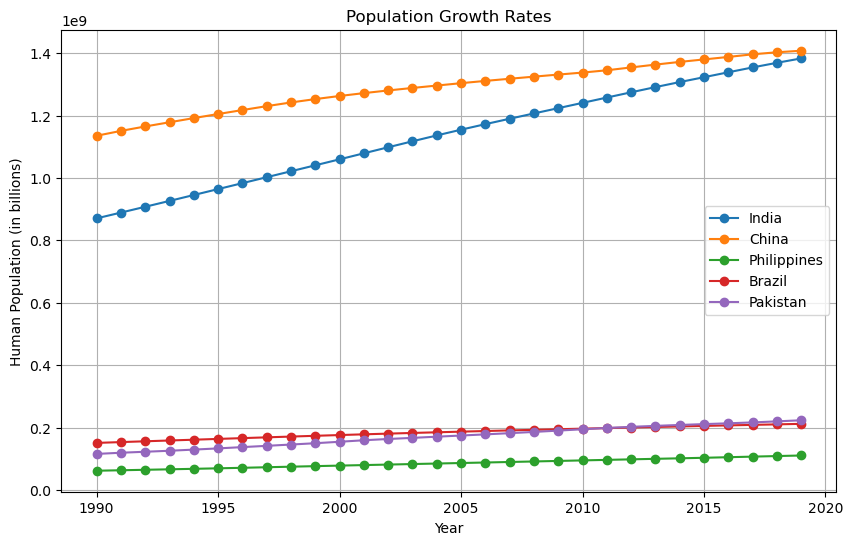

In [13]:
# Plotting the top 5 countries with highest growth rates
plt.figure(figsize=(10, 6))
for i in range(5):
    j = i+1
    plt.plot(filtered_df.index, filtered_df.iloc[:, [i]], marker='o', linestyle='-', label=filtered_df.columns[i])

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Human Population (in billions)')
plt.title('Population Growth Rates')

# Show legend
plt.legend()

# Show grid
plt.grid(True)

# Show the plot
plt.show()

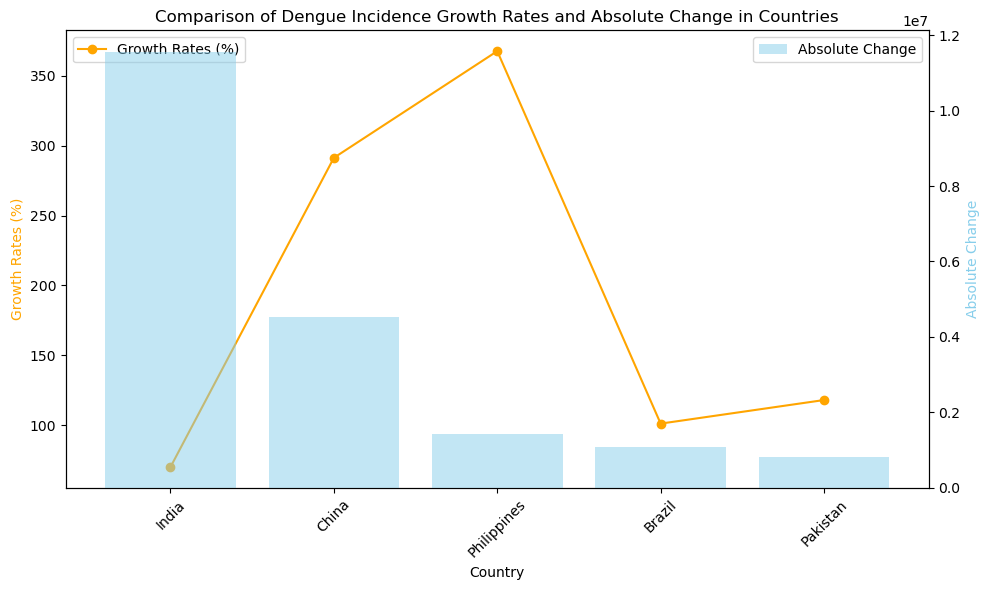

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

#

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot 'growth_rates%' as a line plot
ax1.plot(top_5_countries['Country'], top_5_countries['dengueIncidence_growth_rates%'], marker='o', linestyle='-', color='orange', label='Growth Rates (%)')
ax1.set_xlabel('Country')
ax1.set_ylabel('Growth Rates (%)', color='orange')
ax1.tick_params(axis='x', rotation=45)
ax1.legend(loc='upper left')

# Create a secondary y-axis for 'absolute_change'
ax2 = ax1.twinx()
ax2.bar(top_5_countries['Country'], top_5_countries['absolute_change'], color='skyblue', alpha=0.5, label='Absolute Change')
ax2.set_ylabel('Absolute Change', color='skyblue')
ax2.legend(loc='upper right')

# Set title
plt.title('Comparison of Dengue Incidence Growth Rates and Absolute Change in Countries')

# Show the plot
plt.tight_layout()
plt.show()

Comparative Analysis:

Inida has high absolute change but a relatively lower growth rate of 70% while china and philippines has higher growth rates but lower absolute changes, this shows the magnitude of dengee infaction    



In [16]:
#combin the data by top 5 countries

# Filter the DataFrame based on the index range
filtered_df = population_data[(population_data.index >= 1990) & (population_data.index <= 2019)]
filtered_df = filtered_df[top_5_countries['Country']]

#take two contries for feather analisis
master_China = filtered_df[['China']].copy()
master_China.columns=['China_pop']

master_Philippines = filtered_df[['Philippines']].copy()
master_Philippines.columns=['population']



In [19]:
#reading from surface temperature file of PH
df_surface_temperature_PH = pd.read_csv(surface_temperature_file_PH)
#droping columns
df_surface_temperature_PH.drop(df_surface_temperature_PH.iloc[:, 0:9], axis=1, inplace=True)
df_surface_temperature_PH = df_surface_temperature_PH.transpose()
df_surface_temperature_PH.index = df_surface_temperature_PH.index.astype(int)
df_surface_temperature_PH = df_surface_temperature_PH[(df_surface_temperature_PH.index >= 1990) & (df_surface_temperature_PH.index <= 2019)]

df_surface_temperature_PH.columns = ['surface_temp']
master_Philippines = pd.concat([master_Philippines, df_surface_temperature_PH], axis=1)

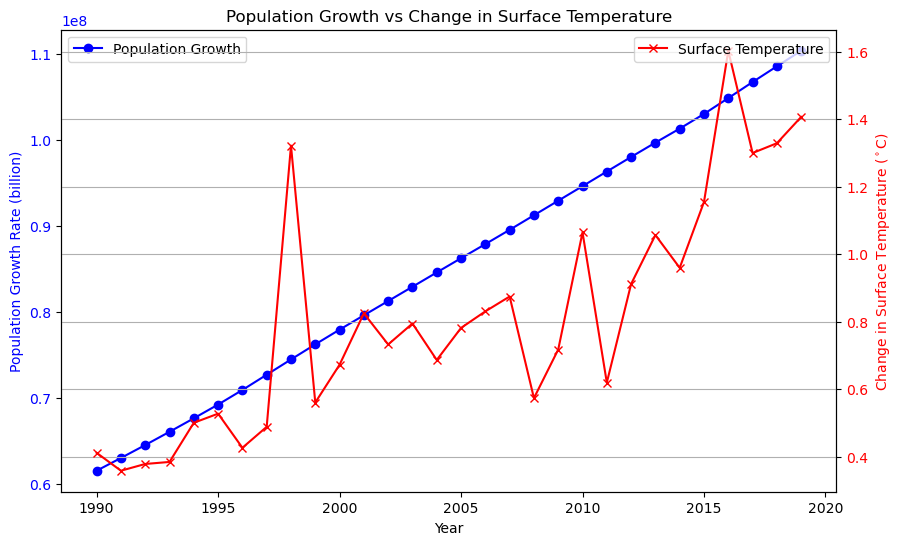

In [18]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Population Growth on primary y-axis (left)
ax1.plot(master_Philippines.index, master_Philippines['population'], color='blue', marker='o', label='Population Growth')
ax1.set_xlabel('Year')
ax1.set_ylabel('Population Growth Rate (billion)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

# Surface Temperature on secondary y-axis (right)
ax2 = ax1.twinx()
ax2.plot(master_Philippines.index, master_Philippines['surface_temp'], color='red', marker='x', label='Surface Temperature')
ax2.set_ylabel('Change in Surface Temperature ($^\circ$C)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc='upper right')

plt.title('Population Growth vs Change in Surface Temperature')
plt.grid(True)
plt.show()

#From the chart it can be seen that the popilation has a linear growth and the surface temperture progressly flutuate in increaseing manaer 

In [20]:
#reading from forst_area
df_forst_area = pd.read_csv(forst_area_file)
#df_forst_area.info()

#droping columns
df_forst_area.drop(df_forst_area.iloc[:, 1:4], axis=1, inplace=True)
#transpose the dataset
df_forst_area = df_forst_area.transpose()
df_forst_area.reset_index(drop=False, inplace=True)
df_forst_area.columns = df_forst_area.iloc[0]

# Drop the first row as it's now used for column names
df_forst_area = df_forst_area[1:]

#rename column
df_forst_area = df_forst_area.rename(columns={'Country Name':'Year'})
#cleaning: removing last row 
df_forst_area.drop(df_forst_area.index[-1], inplace=True)
# set index
df_forst_area = df_forst_area.set_index('Year')

# Changing the index to integers
df_forst_area.index = df_forst_area.index.astype(int)

df_forst_area.index = df_forst_area.index.astype(int)
    
df_forst_area_years = df_forst_area[(df_forst_area.index >= 1990) & (df_forst_area.index <= 2019)]['Philippines']

master_Philippines = pd.concat([master_Philippines, df_forst_area_years], axis=1)
master_Philippines = master_Philippines.rename(columns={'Philippines':'de_forst_area'})

# convert column "ade_forst_area" to float
# using apply method
master_Philippines[['de_forst_area']] = master_Philippines[['de_forst_area']].apply(pd.to_numeric)

master_Philippines = pd.concat([master_Philippines, df_DengueIncidence['Philippines']], axis=1)
master_Philippines = master_Philippines.rename(columns={'Philippines':'dengueIncidence'})


In [ ]:
master_Philippines.info()

[[ 1.         -0.79730169]
 [-0.79730169  1.        ]]


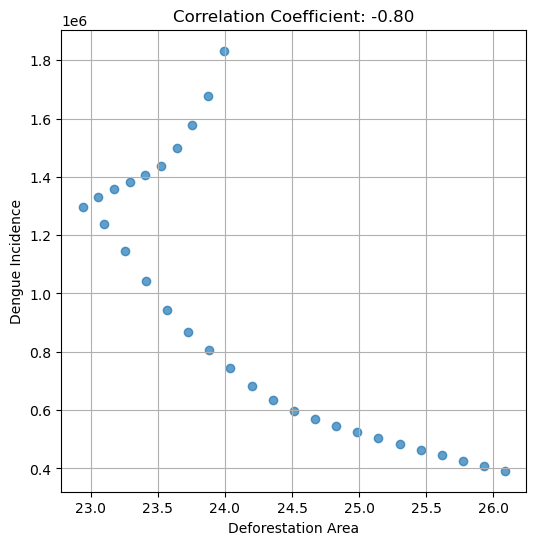

In [22]:
#Looking at the corelation coeffiecnt


# Extracting columns for analysis
de_forst_area = master_Philippines['de_forst_area']
dengue_incidence = master_Philippines['dengueIncidence']

# Calculating correlation coefficient
correlation_matrix = np.corrcoef(de_forst_area, dengue_incidence)
correlation_coefficient = correlation_matrix[0, 1]
print(correlation_matrix)


# Plotting the correlation coefficient
plt.figure(figsize=(6, 6))
plt.scatter(de_forst_area, dengue_incidence, alpha=0.7)
plt.title(f'Correlation Coefficient: {correlation_coefficient:.2f}')
plt.xlabel('Deforestation Area')
plt.ylabel('Dengue Incidence')
plt.grid(True)
plt.show()

In [23]:
#reading from Healthcare Access And Quality Index
df_healthcareAccessAndQualityIndex = pd.read_csv(healthcareAccessAndQualityIndex_file)
df_healthcareAccessAndQualityIndex.info()

#Fillter and extract data for Philippines
df_healthcareAccessAndQualityIndex = df_healthcareAccessAndQualityIndex.loc[df_healthcareAccessAndQualityIndex['Entity'] == "Philippines",["Entity" ,"Year" ,"HAQ Index (IHME (2017))"]]
df_healthcareAccessAndQualityIndex = df_healthcareAccessAndQualityIndex.set_index('Year')
df_healthcareAccessAndQualityIndex

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1332 entries, 0 to 1331
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Entity                   1332 non-null   object 
 1   Code                     1170 non-null   object 
 2   Year                     1332 non-null   int64  
 3   HAQ Index (IHME (2017))  1332 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 41.8+ KB


,Entity,HAQ Index (IHME (2017))
Year,,
1990,Philippines,45.0
1995,Philippines,46.1
2000,Philippines,47.5
2005,Philippines,47.6
2010,Philippines,49.6
2015,Philippines,52.0


In [24]:
#
master_Philippines = pd.concat([master_Philippines, df_healthcareAccessAndQualityIndex["HAQ Index (IHME (2017))"]], axis=1)
master_Philippines

,population,surface_temp,surface_temp,de_forst_area,dengueIncidence,HAQ Index (IHME (2017))
1990,61558898.0,0.412,0.412,26.088507,392057.0,45.0
1991,63039751.0,0.359,0.359,25.931029,408704.0,NaN
1992,64543525.0,0.379,0.379,25.773552,426296.0,NaN
1993,66083321.0,0.385,0.385,25.616075,444638.0,NaN
1994,67650283.0,0.501,0.501,25.458597,463538.0,NaN
1995,69250468.0,0.528,0.528,25.301120,482794.0,46.1
1996,70944969.0,0.427,0.427,25.143643,502699.0,NaN
1997,72718837.0,0.489,0.489,24.986166,523864.0,NaN
1998,74491918.0,1.322,1.322,24.828688,546485.0,NaN
1999,76249064.0,0.561,0.561,24.671211,570792.0,NaN


In [25]:
print_stats_lambda = lambda data: {
    'max': np.max(data),
    'std_dev': np.std(data),
    'skewness': stats.skew(data),
    'kurtosis': stats.kurtosis(data)
}

def print_stats(master_Philippines):
    
    # Loop through columns using a for loop
    for col in master_Philippines.columns:
        print(f'{col}:{print_stats_lambda(master_Philippines[col].values.tolist())}')

print(master_Philippines.describe())
print()
print_stats(master_Philippines)        


       surface_temp  surface_temp  de_forst_area  dengueIncidence  \
count     30.000000     30.000000      30.000000     3.000000e+01   
mean       0.808800      0.808800      24.216821     9.420658e+05   
std        0.342189      0.342189       0.948459     4.485736e+05   
min        0.359000      0.359000      22.938995     3.920570e+05   
25%        0.536250      0.536250      23.439561     5.295192e+05   
50%        0.757500      0.757500      23.937928     8.383495e+05   
75%        1.032750      1.032750      24.946796     1.350048e+06   
max        1.603000      1.603000      26.088507     1.832712e+06   

       HAQ Index (IHME (2017))  
count                 6.000000  
mean                 47.966667  
std                   2.512900  
min                  45.000000  
25%                  46.450000  
50%                  47.550000  
75%                  49.100000  
max                  52.000000  

population:{'max': 110380804.0, 'std_dev': 14584731.941158587, 'skewness': 0.023

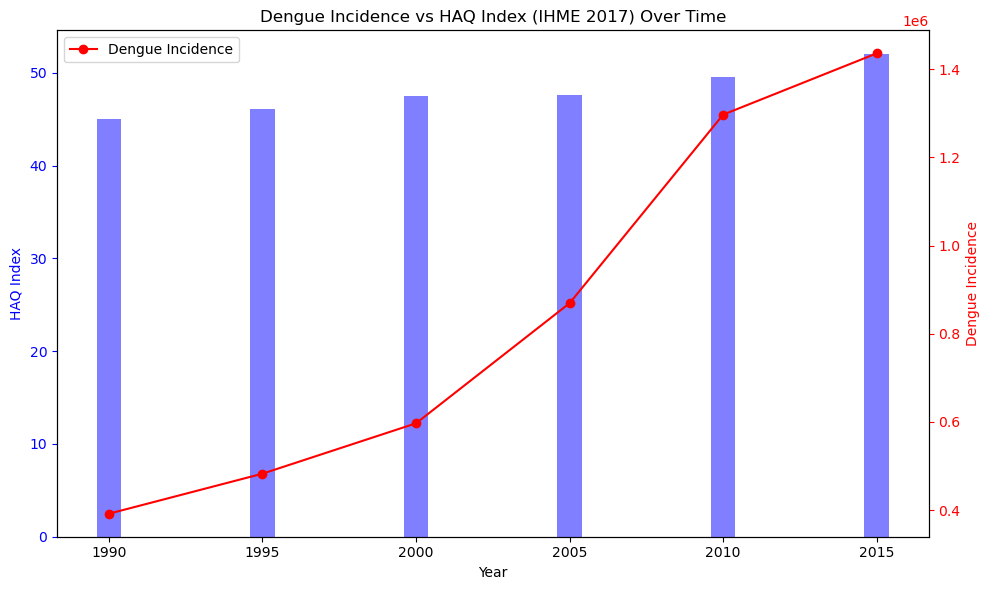

In [26]:
import matplotlib.pyplot as plt

# Provided data
# Provided data
compare_HAQ_index_dengue_incidence = master_Philippines.loc[[1990, 1995, 2000, 2005, 2010, 2015]]
years = compare_HAQ_index_dengue_incidence.index
dengue_incidence = compare_HAQ_index_dengue_incidence["dengueIncidence"]
haq_index = compare_HAQ_index_dengue_incidence["HAQ Index (IHME (2017))"]

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for HAQ Index
ax1.bar(years, haq_index, color='blue', alpha=0.5, label='HAQ Index (IHME 2017)')
ax1.set_xlabel('Year')
ax1.set_ylabel('HAQ Index', color='blue')
ax1.tick_params('y', colors='blue')

# Line chart for Dengue Incidence
ax2 = ax1.twinx()
ax2.plot(years, dengue_incidence, marker='o', linestyle='-', color='red', label='Dengue Incidence')
ax2.set_ylabel('Dengue Incidence', color='red')
ax2.tick_params('y', colors='red')

# Title and legend
plt.title('Dengue Incidence vs HAQ Index (IHME 2017) Over Time')
plt.legend(loc='upper left')

# Show plot
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# using Original dataset

# Compute the correlation matrix
corr_matrix = master_Philippines.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix Plot')
plt.show()
